# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [137]:
# %pip install --upgrade plotly

In [138]:
import warnings 
warnings.filterwarnings('ignore')

## Import Statements

In [139]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [140]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [141]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [142]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [143]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [144]:
print(f'Any NaN values among the data? {df_hh_income.isna().values.any()}')
print(f'Any duplicates? {df_hh_income.duplicated().values.any()}')

print(f'Any NaN values among the data? {df_pct_poverty.isna().values.any()}')
print(f'Any duplicates? {df_pct_poverty.duplicated().values.any()}')

print(f'Any NaN values among the data? {df_pct_completed_hs.isna().values.any()}')
print(f'Any duplicates? {df_pct_completed_hs.duplicated().values.any()}')

print(f'Any NaN values among the data? {df_share_race_city.isna().values.any()}')
print(f'Any duplicates? {df_hh_income.duplicated().values.any()}')

print(f'Any NaN values among the data? {df_fatalities.isna().values.any()}')
print(f'Any duplicates? {df_fatalities.duplicated().values.any()}')

Any NaN values among the data? True
Any duplicates? False
Any NaN values among the data? False
Any duplicates? False
Any NaN values among the data? False
Any duplicates? False
Any NaN values among the data? False
Any duplicates? False
Any NaN values among the data? True
Any duplicates? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [145]:
#merge 3 data frame
df_fatalities.isna().sum()
merged_df = pd.merge(df_pct_poverty, df_hh_income, on=(['Geographic Area', 'City']), how="inner")
merged_df = pd.merge(merged_df, df_pct_completed_hs, on=(['Geographic Area', 'City']), how="inner")
merged_df
merged_df = merged_df.fillna(0)
merged_df.isna().sum()

Geographic Area         0
City                    0
poverty_rate            0
Median Income           0
percent_completed_hs    0
dtype: int64

In [146]:
merged_df.poverty_rate = pd.to_numeric(merged_df.poverty_rate, errors='coerce')
merged_df['Median Income'] = pd.to_numeric(merged_df['Median Income'], errors='coerce')
merged_df.percent_completed_hs = pd.to_numeric(merged_df.percent_completed_hs, errors='coerce')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29320 entries, 0 to 29319
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29320 non-null  object 
 1   City                  29320 non-null  object 
 2   poverty_rate          29119 non-null  float64
 3   Median Income         27434 non-null  float64
 4   percent_completed_hs  29123 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.1+ MB


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [147]:
poverty_rate_chart = merged_df.groupby(by=['Geographic Area'], as_index=False).agg({'poverty_rate': pd.Series.mean})
poverty_rate_chart.sort_values('poverty_rate', ascending=False, inplace=True)

In [148]:
bar = px.bar(poverty_rate_chart,
        x = 'Geographic Area',
        y = 'poverty_rate',
        title='Poverty Rate in each US State',
        hover_name= 'Geographic Area',
        color='Geographic Area',
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='Geographic Area',
                  yaxis_title='poverty_rate',
                  coloraxis_showscale=False)

bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [149]:
high_s_chart = merged_df.groupby(by=['Geographic Area'], as_index=False).agg({'percent_completed_hs': pd.Series.mean})
high_s_chart.sort_values('percent_completed_hs', ascending=False, inplace=True)
high_s_chart

bar = px.bar(high_s_chart,
        x = 'Geographic Area',
        y = 'percent_completed_hs',
        title='Poverty Rate in each US State',
        hover_name= 'Geographic Area',
        color='Geographic Area',
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='Geographic Area',
                  yaxis_title='percent_completed_hs',
                  coloraxis_showscale=False)

bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [150]:
new = merged_df.groupby(by=['Geographic Area'], as_index=False).agg({'poverty_rate': pd.Series.mean, 'percent_completed_hs': pd.Series.mean})
new.sort_values('poverty_rate', ascending=False, inplace=True)

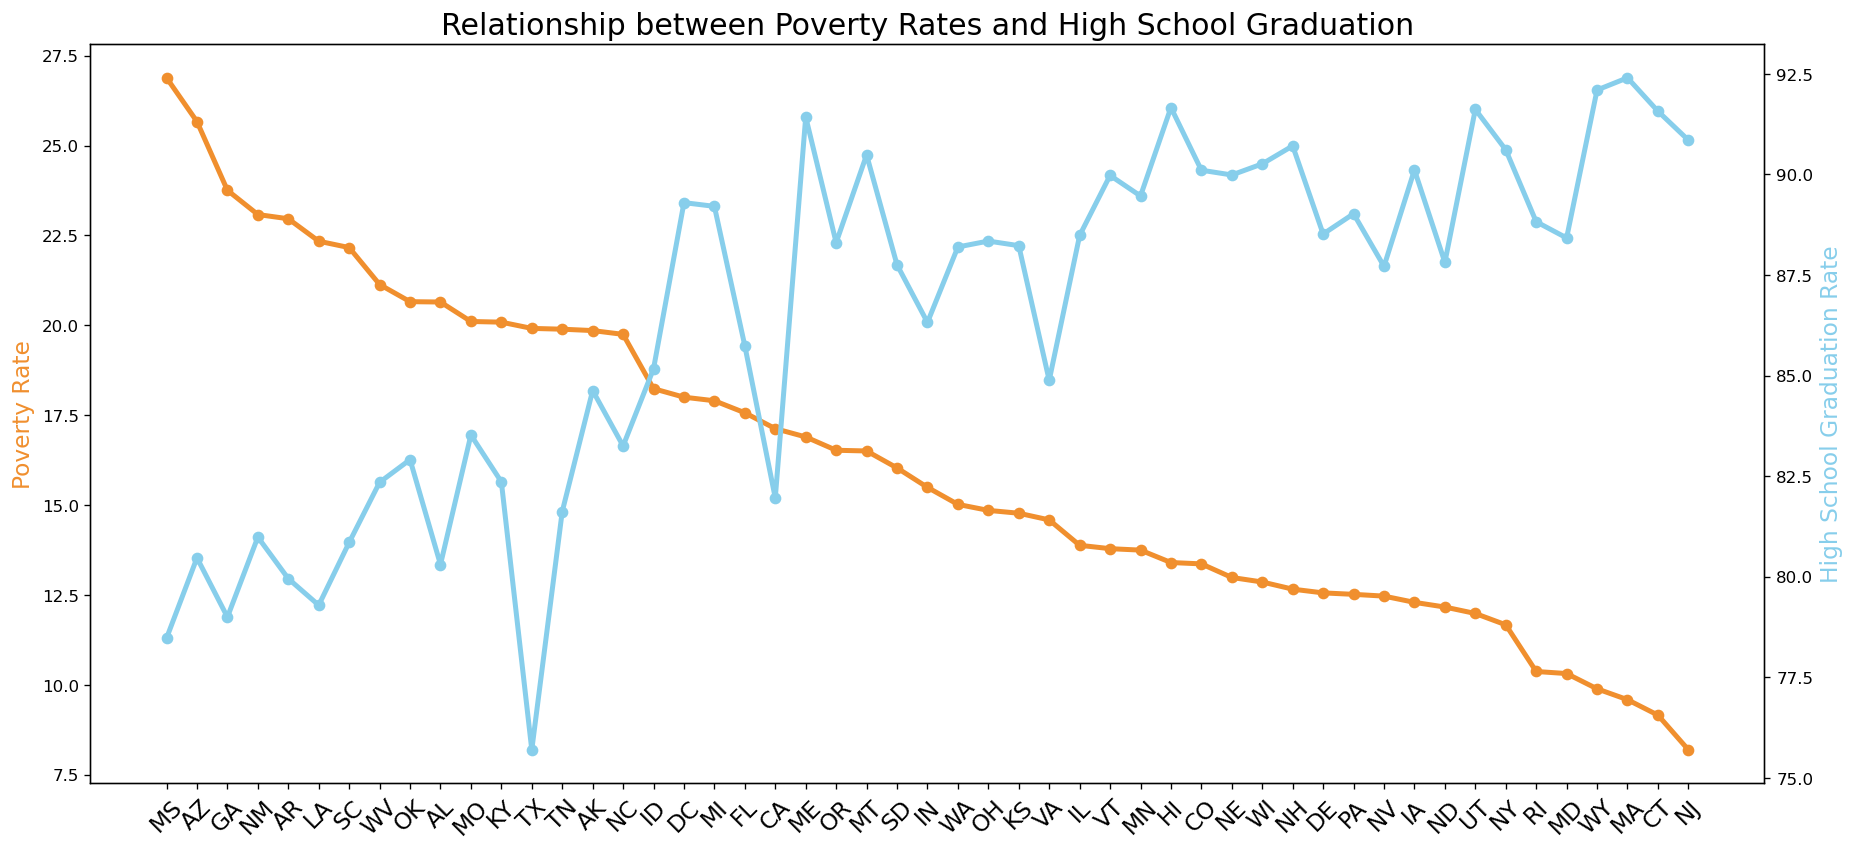

In [151]:
plt.figure(figsize=(18,8), dpi=120)

plt.title('Relationship between Poverty Rates and High School Graduation', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty Rate', color='#F08F2E', fontsize=14)
ax2.set_ylabel('High School Graduation Rate', color='skyblue', fontsize=14)

# ax1.xaxis.set_major_locator(years)
# ax1.xaxis.set_major_formatter(years_fmt)
# ax1.xaxis.set_minor_locator(months)


# Experiment with the linestyle and markers
ax1.plot(new['Geographic Area'], new['poverty_rate'], 
         color='#F08F2E', linewidth=3, marker='o')
ax2.plot(new['Geographic Area'], new['percent_completed_hs'], 
         color='skyblue', linewidth=3, marker='o')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

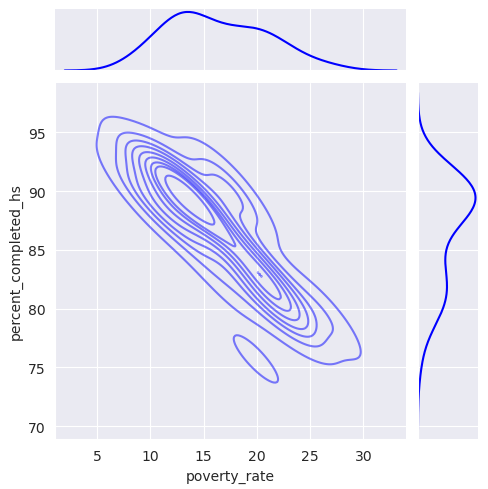

In [152]:

with sns.axes_style('darkgrid'):
  sns.jointplot(
                x=new['poverty_rate'], 
                y=new['percent_completed_hs'],
                kind='kde',
                height=5,
                color='blue', 
                joint_kws={'alpha':0.5})
plt.show()

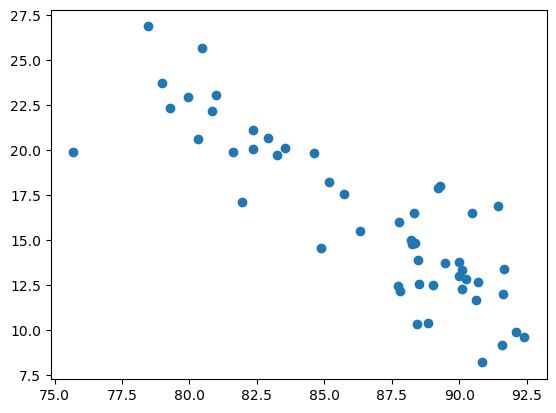

In [153]:
plt.scatter(new['percent_completed_hs'], new['poverty_rate'])

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

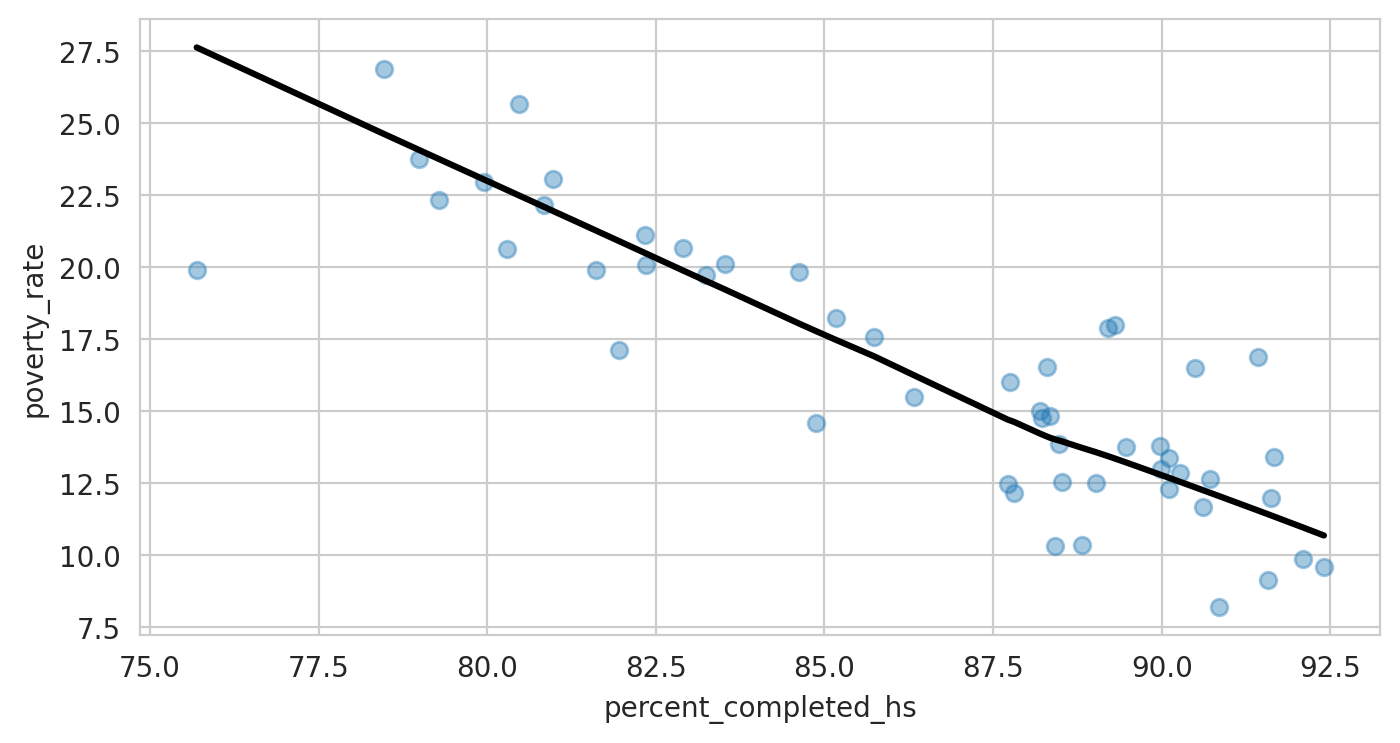

<Figure size 1600x800 with 0 Axes>

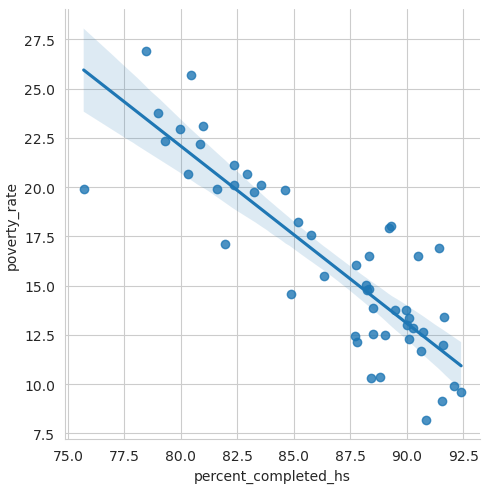

In [154]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(
                x=new['percent_completed_hs'],
                y=new['poverty_rate'],
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(
                x='percent_completed_hs',
                y='poverty_rate',
                data = new,
                )

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [155]:
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')
df_share_race_city
df_race = df_share_race_city.groupby(by=['Geographic area'], as_index=False).agg({'share_white': pd.Series.mean, 'share_black': pd.Series.mean, 'share_native_american': pd.Series.mean, 'share_asian': pd.Series.mean, 'share_hispanic': pd.Series.mean})
df_race.sort_values('share_white', ascending=False, inplace=True)
df_race.head(5)

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
12,IA,96.71,0.56,0.27,0.40,2.82
46,VT,95.87,0.77,0.37,0.91,1.38
21,ME,95.69,0.82,0.55,1.03,1.31
30,NH,95.68,0.72,0.29,1.34,1.74
49,WV,95.04,2.92,0.20,0.34,0.90


In [156]:
v_bar_split = px.bar(df_race,
                     x = 'Geographic area',
                     y = ['share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'] ,
                     title='The Racial Makeup of Each US State')

v_bar_split.update_layout(xaxis_title='US States', 
                          yaxis_title='Racial Makeup'
                
                         )
v_bar_split.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [157]:
x = df_fatalities.race.value_counts()
x.index = x.index.astype(str).str.replace('W', "white")
x.index = x.index.astype(str).str.replace('B', "black")
x.index = x.index.astype(str).str.replace('H', "hispanic")
x.index = x.index.astype(str).str.replace('A', "asian")
x.index = x.index.astype(str).str.replace('N', "native american")
x.index = x.index.astype(str).str.replace('O', "other")
x

race
white              1201
black               618
hispanic            423
asian                39
native american      31
other                28
Name: count, dtype: int64

In [158]:
fig = px.pie(labels=x.index, 
             values=x.values,
             title="People Killed by Race",
             names=x.index,
             hole=0.3,
)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [159]:
gender = df_fatalities.gender.value_counts()
gender.index = gender.index.astype(str).str.replace('F', "Female")
gender.index = gender.index.astype(str).str.replace('M', "Male")

In [160]:
fig = px.pie(labels=gender.index, 
             values=gender.values,
             title="People Killed by Race",
             names=gender.index,
             
)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [161]:
data_filtered = df_fatalities[['age', 'manner_of_death', 'gender']].dropna()
data_filtered

,age,manner_of_death,gender
0,53.00,shot,M
1,47.00,shot,M
2,23.00,shot and Tasered,M
3,32.00,shot,M
4,39.00,shot,M
...,...,...,...
2529,32.00,shot,M
2530,31.00,shot,M
2532,48.00,shot,M
2533,28.00,shot,M


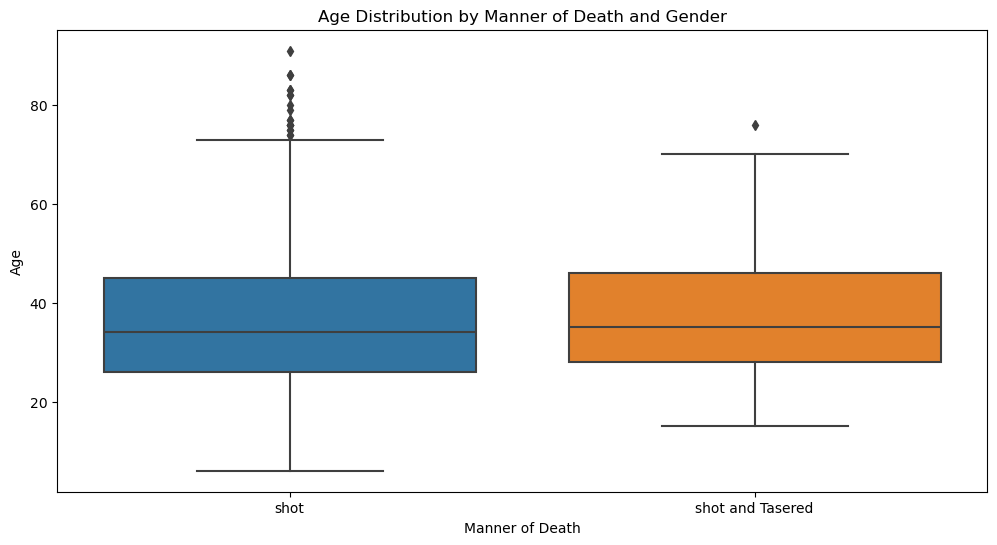

In [162]:
# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='manner_of_death', y='age', data=data_filtered)
plt.title('Age Distribution by Manner of Death and Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.show()

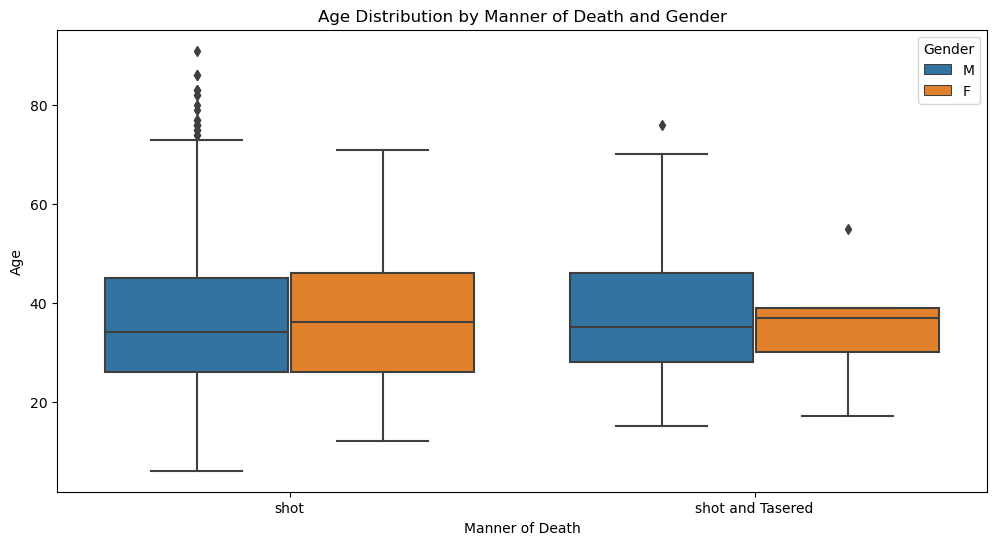

In [163]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=data_filtered)
plt.title('Age Distribution by Manner of Death and Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [164]:
armed_df = df_fatalities[['armed']]
armed_df['armed'] = armed_df['armed'].apply(lambda x: 'armed' if x != 'unarmed' else 'unarmed')
armed_vs_unarmed = armed_df['armed'].value_counts(normalize=True)*100
armed_vs_unarmed

fig = px.pie(labels=armed_vs_unarmed.index, 
             values=armed_vs_unarmed.values,
             title="People Killed by Race",
             names=armed_vs_unarmed.index,
             hole=0.3,
)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [165]:
wep_df = df_fatalities[df_fatalities['armed'] != 'unarmed']['armed'].value_counts()
 
h_bar = px.bar(wep_df,
               x=wep_df.values,
               y=wep_df.index,
               orientation='h',
               color=wep_df.index,
               color_continuous_scale='Viridis',
               title='kind of weapon')

h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()


In [166]:
gun_df = df_fatalities[['armed']]
gun_df = gun_df['armed'].value_counts().reset_index(name='counts')

gun_df = gun_df.query('armed == "gun" or armed == "unarmed"')

import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = px.pie(labels=gun_df.armed, 
             values=gun_df.counts,
             title="people killed by police were armed with guns versus unarmed",
             names=gun_df.armed,
             
)
fig.update_traces(textposition='outside', textinfo='percent+label', textfont_size=20,pull=[0, 0.2],
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [167]:
age_ = df_fatalities[['age']].dropna()
under_25 = round(age_[age_['age'] < 25 ].shape[0] /  age_.shape[0] *100, 2)
under_25
print(f"{under_25}% percentage of people killed were under 25 years old")

18.31% percentage of people killed were under 25 years old


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

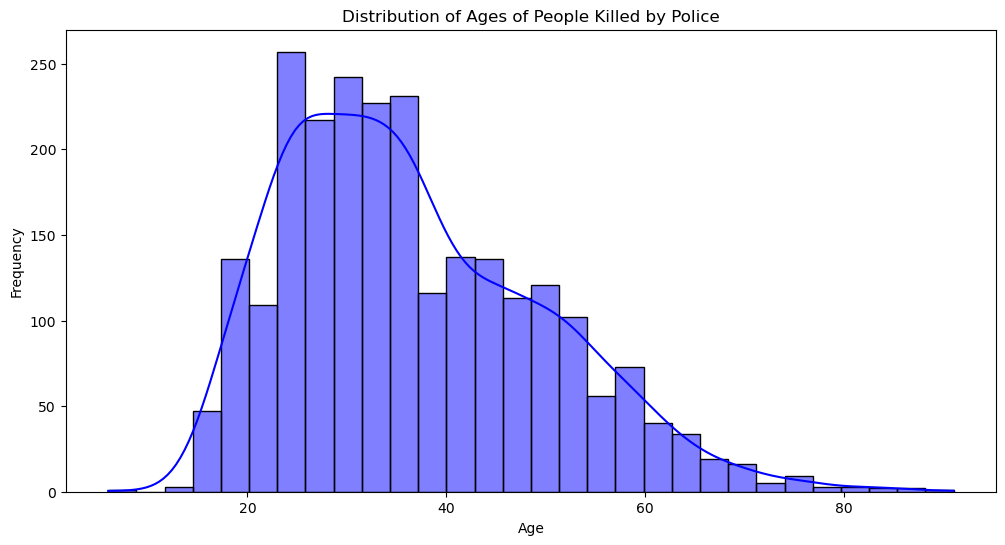

In [168]:
plt.figure(figsize=(12, 6))
sns.histplot(age_['age'], bins=30, kde=True, color='blue')

# Add titles and labels
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

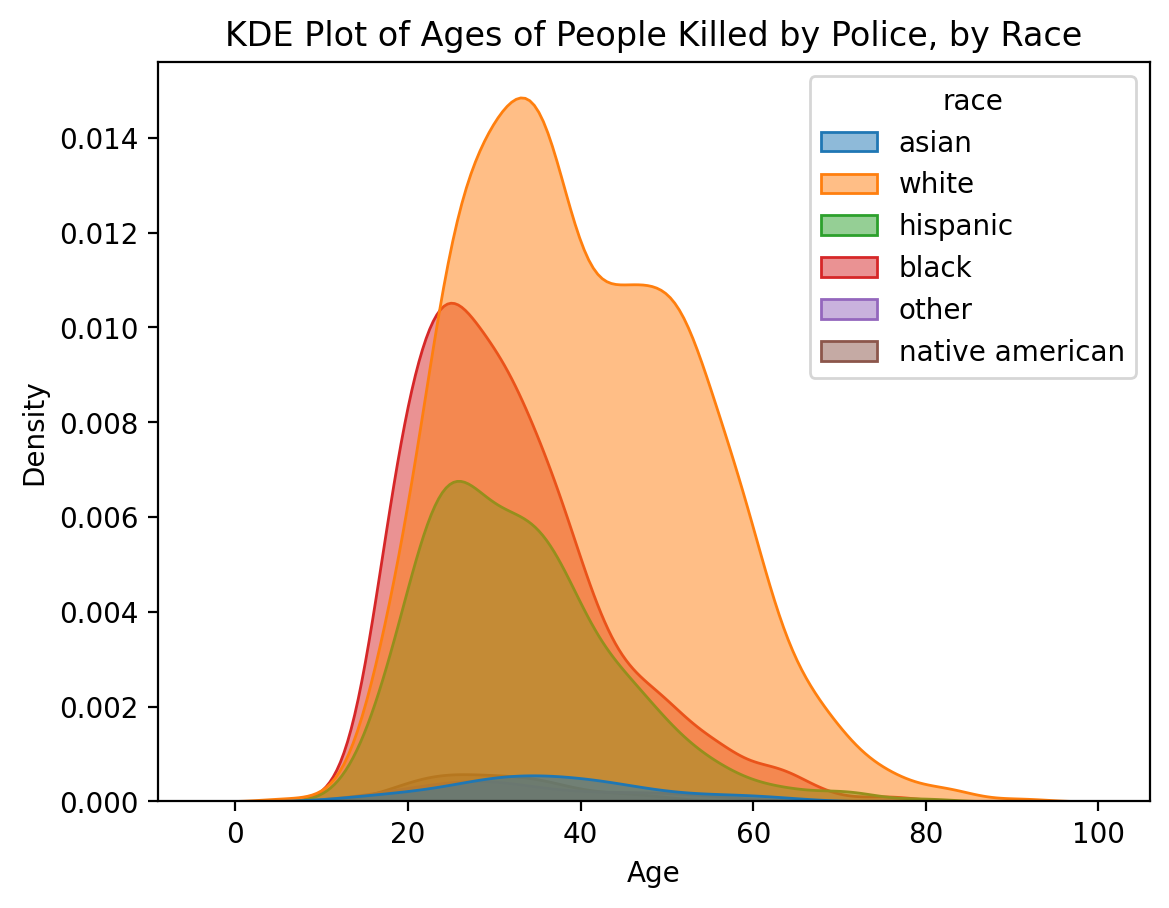

In [169]:
by_race = df_fatalities[['age', 'race']].dropna()
by_race
by_race.race = by_race.race.astype(str).str.replace('W', "white")
by_race.race = by_race.race.astype(str).str.replace('B', "black")
by_race.race = by_race.race.astype(str).str.replace('H', "hispanic")
by_race.race = by_race.race.astype(str).str.replace('A', "asian")
by_race.race = by_race.race.astype(str).str.replace('N', "native american")
by_race.race = by_race.race.astype(str).str.replace('O', "other")
by_race

plt.figure(dpi=200)
sns.kdeplot(by_race,
            x=by_race.age,
            hue=by_race.race,
            shade=True,
            alpha=0.5
            )
# Add titles and labels
plt.title('KDE Plot of Ages of People Killed by Police, by Race')
plt.xlabel('Age')
plt.ylabel('Density')


plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [170]:
killed_by_race = df_fatalities[['race']].dropna()
killed_race = killed_by_race.race.value_counts()

h_bar = px.bar(x=killed_race.values,
               y=killed_race.index,
               orientation='h',
               color=killed_race.index,
               color_continuous_scale='Viridis',
               title='The Total Number Of People Killed By Race')

h_bar.update_layout(xaxis_title='Number Of People Killed', 
                    yaxis_title='Race',
                    coloraxis_showscale=False)
h_bar.show()


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [171]:
df_fatalities
killed_by_mental = df_fatalities[['signs_of_mental_illness']].dropna()
mental_ill = killed_by_mental.value_counts().reset_index(name='num')
mental_ill

,signs_of_mental_illness,num
0,False,1902
1,True,633


In [172]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = px.pie(labels=mental_ill.signs_of_mental_illness, 
             values=mental_ill.num,
             title="people killed by police were armed with guns versus unarmed",
             names=mental_ill.signs_of_mental_illness,
             
)
fig.update_traces(textposition='outside', textinfo='percent+label', textfont_size=20,pull=[0, 0.2],
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [173]:
by_cities = df_fatalities.city.value_counts().reset_index(name='num')[:10]
by_cities

,city,num
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


In [174]:
bar = px.bar(by_cities,
        x = 'city',
        y = 'num',
        title='top 10 cities with the most police killings',
        hover_name= 'city',
        color='city',
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='City',
                  yaxis_title='Rate',
                  coloraxis_showscale=False)

bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [175]:
clean_share_race = df_share_race_city.dropna()
df_race_city = clean_share_race.groupby(by=['City'], as_index=False).agg({ 'share_white': pd.Series.mean, 'share_black': pd.Series.mean, 'share_native_american': pd.Series.mean, 'share_asian': pd.Series.mean, 'share_hispanic': pd.Series.mean})
df_race_city.sort_values('share_white', ascending=False, inplace=True)
df_race_city

,City,share_white,share_black,share_native_american,share_asian,share_hispanic
12320,Lock Springs village,100.00,0.00,0.00,0.00,0.00
18769,Rozel city,100.00,0.00,0.00,0.00,4.50
1880,Bison CDP,100.00,0.00,0.00,0.00,1.50
15570,Northboro city,100.00,0.00,0.00,0.00,3.40
3122,Campo Verde CDP,100.00,0.00,0.00,0.00,100.00
...,...,...,...,...,...,...
19438,Sehili CDP,0.00,0.00,100.00,0.00,1.50
22332,Ventana CDP,0.00,0.00,100.00,0.00,4.10
9856,Hoot Owl town,0.00,0.00,100.00,0.00,0.00
22182,Vaiva Vo CDP,0.00,0.80,97.70,0.00,0.80


In [176]:
city_clean = clean_share_race.City.value_counts()[:10]
city_clean


City
Franklin city       16
Salem city          14
Marion city         14
Madison city        14
Auburn city         13
Springfield city    13
Clinton city        13
Aurora city         12
Greenville city     12
Columbus city       11
Name: count, dtype: int64

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [177]:
state_map = df_fatalities.state.value_counts()

fig = px.choropleth(locations=state_map.index, locationmode="USA-states", color=state_map.values, scope="usa")
fig.show()

In [178]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [179]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

In [180]:
df_fatalities.sort_values('date', inplace=True)
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
153,268,Donald Lewis Matkins,2015-01-03,shot,gun,49.00,M,W,Barton,MS,False,attack,Not fleeing,False
154,194,Charly Leundeu Keunang,2015-01-03,shot and Tasered,unarmed,43.00,M,B,Los Angeles,CA,True,attack,Not fleeing,True
155,195,Hung Trieu,2015-01-03,shot,gun,35.00,M,A,Houston,TX,False,attack,Not fleeing,False
246,533,Shawn Clyde,2015-01-04,shot,knife,36.00,M,W,Hamilton,NJ,False,attack,Not fleeing,False
245,267,Robert Washington,2015-01-04,shot,gun,37.00,M,B,Hawthorne,CA,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,2658,Eleuterio Amaya-Torres,2017-12-06,shot,gun,63.00,M,H,Plano,TX,False,attack,Not fleeing,False
2395,2656,Johnny Platas,2017-12-06,shot and Tasered,knife,45.00,M,H,Selma,CA,False,other,Not fleeing,False
2487,2772,James Gerald Davis,2017-12-07,shot,NaN,40.00,M,NaN,Lake View,SC,False,undetermined,NaN,False
2486,2771,Dorsey Glenn Taulbee Jr.,2017-12-07,shot,gun,33.00,M,NaN,Oklahoma City,OK,False,attack,Not fleeing,False


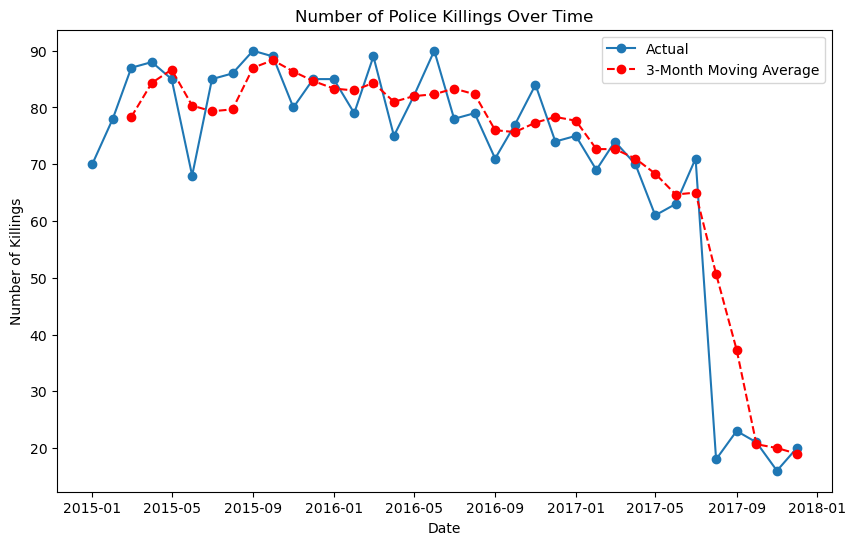

In [181]:

# df_fatalities.groupby(['date']).agg({'date': pd.Series.count})
kill_by_date = df_fatalities.date.value_counts().reset_index(name='kill')
kill_by_date.sort_values('date', inplace=True)

kill_by_date['month'] = kill_by_date.date.dt.month
kill_by_date['year'] = kill_by_date.date.dt.year
kill_by_date
kill_by_date = kill_by_date.groupby(by=['year', 'month'], as_index=False).agg({'kill': pd.Series.sum})
kill_by_date.sort_values(['year', 'month'], inplace=True)

kill_by_date['Date'] = pd.to_datetime(kill_by_date[['year', 'month']].assign(DAY=1))

kill_by_date['Moving Average'] = kill_by_date['kill'].rolling(window=3).mean()


plt.figure(figsize=(10, 6))
plt.plot(kill_by_date['Date'], kill_by_date['kill'], marker='o', label='Actual', linestyle='-')
plt.plot(kill_by_date['Date'], kill_by_date['Moving Average'], marker='o', label='3-Month Moving Average', linestyle='--', color='red')
plt.title('Number of Police Killings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Killings')
plt.legend()
plt.show()